In [1]:
import ultralytics
from ultralytics import YOLO


In [39]:
from PIL import Image
from IPython.display import display
import cv2
import numpy as np

In [2]:
ultralytics.checks()

Ultralytics YOLOv8.0.215 🚀 Python-3.9.18 torch-2.1.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Setup complete ✅ (16 CPUs, 63.7 GB RAM, 14.9/1907.7 GB disk)


In [3]:
model = YOLO("best.pt")

Rozwiązanie bazowe na fragmencie ze zbioru testowego

In [4]:
file_in = "IMG_0983"

In [5]:
img = "dev-0/in/" + file_in + ".jpg"
pred_image = model.predict(conf=0.5, source=img)
result = pred_image[0]


image 1/1 e:\gonito_tomato\dev-0\in\IMG_0983.jpg: 640x480 4 b_greens, 539.1ms
Speed: 3.0ms preprocess, 539.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


In [6]:
image = cv2.imread(img)
# Convert image to uint8 data type
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.array(image, dtype=np.uint8)

In [7]:
for box in result.boxes:
    cords =box.xyxy[0].tolist()
    class_id =box.cls[0].item()
    conf = box.conf[0].item()
    start = (int(cords[0]),int(cords[1])) # x0, y0
    end   = (int(cords[2]),int(cords[3])) # x1, y1
    text = result.names[class_id]
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_DUPLEX, 1.9, 2)[0]
    rectangle_position = (start[0], start[1] - text_size[1] - 10)
    rectangle_size = (text_size[0] + 30, text_size[1] + 20)
    cv2.rectangle(image, rectangle_position, (rectangle_position[0] + rectangle_size[0], rectangle_position[1] + rectangle_size[1]), (255, 255, 255), -1)

    # Draw the bounding box
    cv2.rectangle(image, start, end, (0, 200, 0), thickness=2)

    # Put the text on top of the highlighted background
    cv2.putText(image, text, (start[0] + 15, start[1] - 5), cv2.FONT_HERSHEY_DUPLEX, 1.9, (10, 0, 10), 2)  # show detection objects on image# show detection objects on image

In [8]:
result.boxes.cls

tensor([2., 2., 2., 2.])

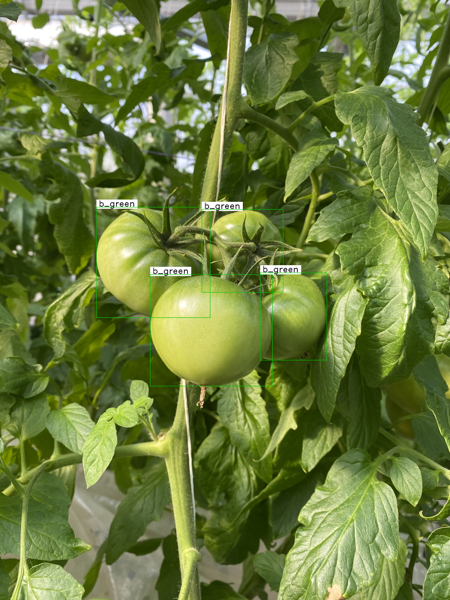

In [14]:

picture = Image.fromarray(image)
desired_size = (700, 600)
picture.thumbnail(desired_size)
# Display the image
display(picture)

Metric for GONITO - mean average precision

In [40]:
metrics = model.val(data='dataset.yaml')
mAP = metrics.box.ap.mean()
print(mAP)

Ultralytics YOLOv8.0.215 🚀 Python-3.9.18 torch-2.1.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)


val: Scanning E:\tomAIto\model\datasets\val\labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [02:00<00:00, 10.93s/it]


                   all        161       1996      0.814      0.835       0.88      0.786
       b_fully_ripened        161         72      0.799      0.778      0.854      0.788
        b_half_ripened        161        116       0.78      0.819      0.844      0.765
               b_green        161        387      0.861      0.928      0.956      0.847
       l_fully_ripened        161        269      0.803      0.835      0.878       0.79
        l_half_ripened        161        223      0.758      0.776      0.819      0.735
               l_green        161        929      0.881      0.873      0.928      0.791
Speed: 2.0ms preprocess, 629.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\val6
0.786025264281105
